In [2]:
import sympy as sym
from IPython.display import display
from IPython.core.display import Math
import numpy as np
import matplotlib.pyplot as plt
from sympy.abc import x
from matplotlib.patches import Polygon
import sympy.plotting.plot as symplot
import scipy as sp
from scipy.signal import find_peaks
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image
import pandas as pd
from scipy.stats import rankdata
import seaborn as sns
sym.init_printing()

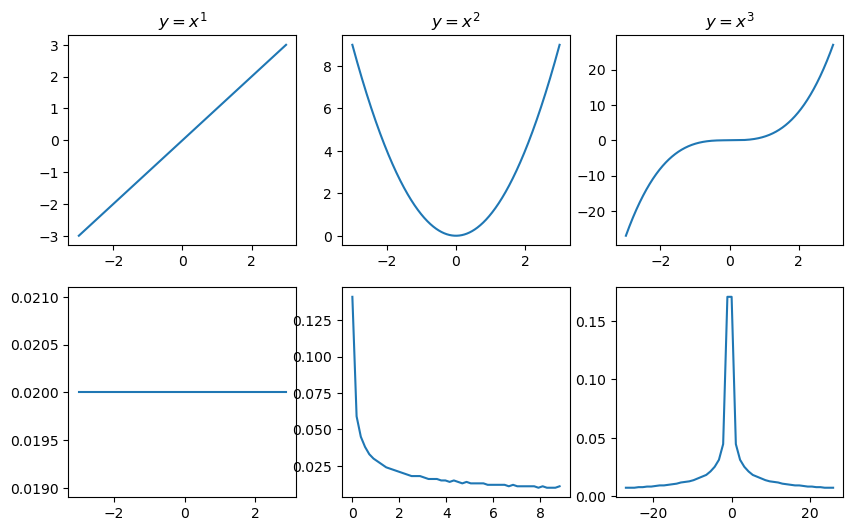

In [3]:
x = np.linspace(-3, 3, 2000)
fig, ax = plt.subplots(2, 3)
fig = fig.set_size_inches(10, 6)
for i in range(3):
    y = x**(i+1)
    h = np.histogram(y, 50)
    yP = h[0]/np.sum(h[0])

    ax[0, i].plot(x, y)
    ax[0, i].set_title('$y = x^{%g}$' % (i+1))

    ax[1, i].plot(h[1][:-1], yP)


plt.show()

C:\Users\kantulaev\AppData\Local\Temp\ipykernel_336\1762118554.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ms-" (-> color='m'). The keyword argument will take precedence.
  plt.plot(range(1, 7), pureprobs, 'ms-',markersize=10, color='m')


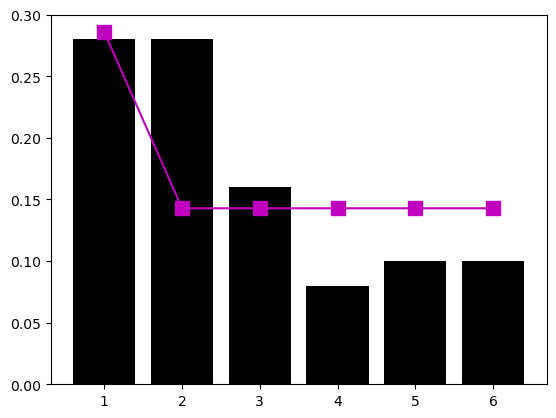

In [4]:

n = 50
outcome = np.zeros(6)
pureprobs = np.array([2, 1, 1, 1, 1, 1])
pureprobs = pureprobs / np.sum(pureprobs)

for i in range(n):
    dieroll = np.random.randint(0, 7)

    if dieroll == 6:
        dieroll = 0

    outcome[dieroll] += 1

plt.bar(range(1, 7), outcome/n, color='k')
plt.plot(range(1, 7), pureprobs, 'ms-',markersize=10, color='m')

[ 27.   1.  41.  33.   6.  54.  83.  61.  48.  96.  43.  10.  31.  73.
   7.  20.  38.  55.  75.  30.  35.   9.  89.  82.  22.  52.  87.  84.
  46.  79.  97.  16.   4.  69.  53.  95.  12.  71.  15.  25.  76.  62.
  58.   5.  50.  34.  65.  49.  23.  78.  32. 100.  68.  99.  44.  47.
  18.  94.  42.  77.  72.  88.  66.  11.  57.  14.  21.  39.  86.  81.
  74.  85.  98.  64.  67.  60.   8.  90.  40.  28.  37.  92.  13.  93.
  91.  70.  45.  29.   2.  80.  24.   3.  36.  56.  26.  63.  17.  51.
  59.  19. 101.]


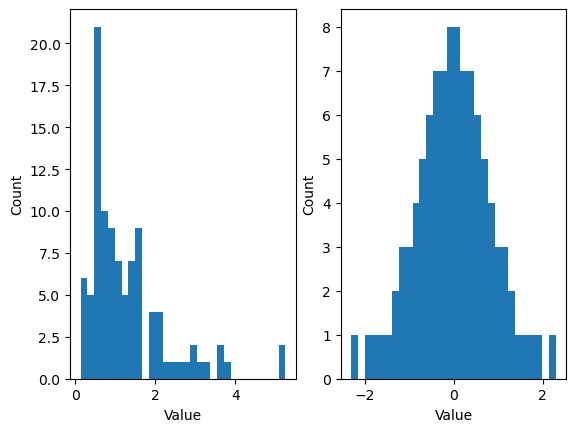

In [5]:
n = 100
orig_data = 2 ** np.random.randn(n)

rank_data = rankdata(orig_data)
rank_data = np.append(rank_data, np.max(rank_data)+1)

norm_data = 2*(rank_data/np.max(rank_data))-1
norm_data = np.delete(norm_data, n)

trans_data = np.arctanh(norm_data)
print(rank_data)

fig, ax = plt.subplots(1, 2)
ax[0].hist(orig_data, 30)
ax[0].set_xlabel('Value')
ax[0].set_ylabel('Count')
ax[1].hist(trans_data, 30)
ax[1].set_xlabel('Value')
ax[1].set_ylabel('Count')

plt.show()

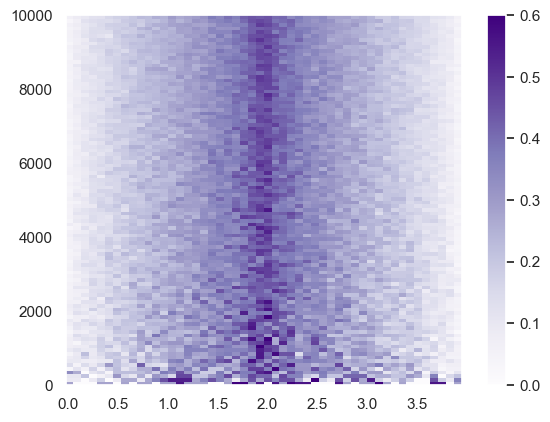

In [6]:
n = np.arange(50, 10000, 100)
nbins = 50
matr = np.zeros((len(n), nbins))
for i in range(len(n)):
    y1 = np.sin(np.linspace(0, 6*np.pi, n[i]))
    y2 = (np.random.rand(n[i])*2+1)
    matr[i, :], x = np.histogram(y1+y2, nbins, density=True)

sns.set()
plt.pcolor(x[:-1], n, matr,vmax=.6,cmap = 'Purples')
plt.colorbar()
plt.show()

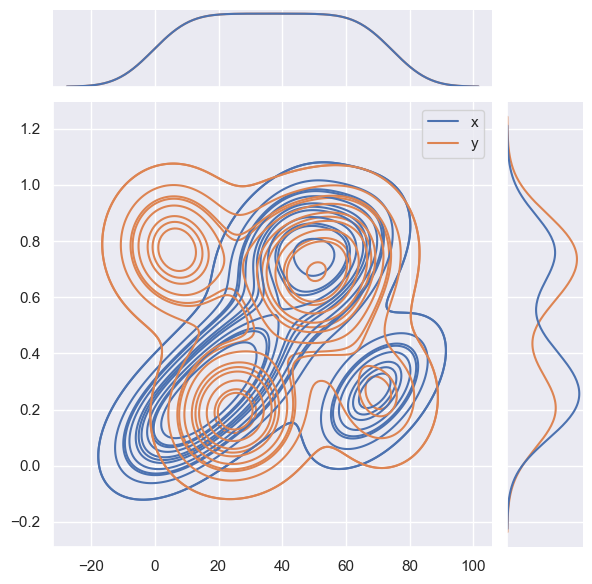

In [7]:
sns.set()
data = pd.read_csv('photos/data.csv', header=None, names=['x', 'y'])
sns.jointplot(data, kind='kde',
              levels=5).plot_joint(sns.kdeplot)
plt.show()